<a href="https://colab.research.google.com/github/MiggieCS911/MedBudgetPrediction/blob/main/MedBudgetPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy
from scipy import optimize as optim
from scipy.stats import linregress as Linear_regression
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import time

# Project plan

**Predict cost of medication of next year by previous amount dispension.**<br/>

**Dataset** is come form Vajira hospital by Dr. Padoemwut. We select dataset that medication was available in 2565. <br/>

**Step of Analysis**
- Optimize the best model to fit data from 2561 - 2565: linear regression, curve? of individual drug. The distance = RMSE/MSE/Absolute error
- Predict amount fo each individual medication.
- Cost of medication = amount * price
- Run Montecarlo simulation: vary price of each medication: preidiction, RMSE-price

# Import  data

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/medication_prediction_project/data/Medbudget.xlsx')
print(df.shape)

(2576, 15)


In [ ]:
df.head()

,Meditem,Medtype,Medname,Medcost,LastEffctiveDate,Med2561,Med2562,Med2563,Med2564,Med2565,Cost2561,Cost2562,Cost2563,Cost2564,Cost2565
0,5,10,IRBESARTAN (APROVEL) 150 MG.,6.96,2017-05-17,94583,130216,115275,96186,13417,658297.70,906303.40,802314.0,669454.6,93382.32
1,6,10,HY-DRALAZINE (APRESOLINE) 25 MG.,1.50,2012-08-20,1202588,0,40012,0,0,1803882.00,0.00,60018.0,0.0,0.00
2,7,40,CISPLATIN (CA) 10 MG.,117.70,2015-11-27,506,478,883,0,0,59556.20,56260.60,103929.1,0.0,0.00
3,8,40,CISPLATIN (CA) 50 MG.,321.00,2022-04-26,520,936,7977,2053,2128,166920.00,300456.00,2560617.0,659013.0,683088.00
4,16,10,ACETAR 1000 ML.,38.52,2022-09-07,499,606,3347,5939,10550,19221.48,23343.12,128926.4,228770.3,406386.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Meditem           2576 non-null   int64         
 1   Medtype           2576 non-null   int64         
 2   Medname           2576 non-null   object        
 3   Medcost           2570 non-null   float64       
 4   LastEffctiveDate  2570 non-null   datetime64[ns]
 5   Med2561           2576 non-null   int64         
 6   Med2562           2576 non-null   int64         
 7   Med2563           2576 non-null   int64         
 8   Med2564           2576 non-null   int64         
 9   Med2565           2576 non-null   int64         
 10  Cost2561          2576 non-null   float64       
 11  Cost2562          2576 non-null   float64       
 12  Cost2563          2576 non-null   float64       
 13  Cost2564          2576 non-null   float64       
 14  Cost2565          2576 n

In [ ]:
df.columns

Index(['Meditem', 'Medtype', 'Medname', 'Medcost', 'LastEffctiveDate',
       'Med2561', 'Med2562', 'Med2563', 'Med2564', 'Med2565', 'Cost2561',
       'Cost2562', 'Cost2563', 'Cost2564', 'Cost2565'],
      dtype='object')

In [ ]:
df = df[['Meditem', 'Medtype', 'Medname', 'Medcost', 'LastEffctiveDate',
       'Med2561', 'Med2562', 'Med2563', 'Med2564', 'Med2565']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Meditem           2576 non-null   int64         
 1   Medtype           2576 non-null   int64         
 2   Medname           2576 non-null   object        
 3   Medcost           2570 non-null   float64       
 4   LastEffctiveDate  2570 non-null   datetime64[ns]
 5   Med2561           2576 non-null   int64         
 6   Med2562           2576 non-null   int64         
 7   Med2563           2576 non-null   int64         
 8   Med2564           2576 non-null   int64         
 9   Med2565           2576 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 201.4+ KB


In [ ]:
#find primary key
df.Meditem.nunique()

2576

In [ ]:
#chage Meditem to str
df['Meditem'] = df.Meditem.apply(lambda x: str(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Meditem           2576 non-null   object        
 1   Medtype           2576 non-null   int64         
 2   Medname           2576 non-null   object        
 3   Medcost           2570 non-null   float64       
 4   LastEffctiveDate  2570 non-null   datetime64[ns]
 5   Med2561           2576 non-null   int64         
 6   Med2562           2576 non-null   int64         
 7   Med2563           2576 non-null   int64         
 8   Med2564           2576 non-null   int64         
 9   Med2565           2576 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 201.4+ KB


Primary key == Meditem

### check null

In [ ]:
df.isnull().sum()

Meditem             0
Medtype             0
Medname             0
Medcost             6
LastEffctiveDate    6
Med2561             0
Med2562             0
Med2563             0
Med2564             0
Med2565             0
dtype: int64

There are 6 drugs that no Medcost

In [ ]:
df[df['Medcost'].isnull()]

,Meditem,Medtype,Medname,Medcost,LastEffctiveDate,Med2561,Med2562,Med2563,Med2564,Med2565
557,8145,70,BARIUM SULFATE 450 GM.,NaN,NaT,0,0,0,768,433
597,20162,10,FUCIDIN IV 500 MG INJ,NaN,NaT,0,0,1,2,2
1800,5010000879,10,BOOSTAGEN (???????) 0.5 mL,NaN,NaT,737,196,0,0,0
2341,5040028576,40,Gemcitabine (????? ?.ROCHE) 1000 MG,NaN,NaT,22,1,0,0,0
2343,5040028578,40,Atezolizumab (????? ?.ROCHE) 1200 MG,NaN,NaT,26,24,17,27,87
2511,5040028767,40,Tiragolumab (?????),NaN,NaT,0,0,0,0,12


In [ ]:
# Remove 6 drugs that no price --> save in list
removedMedication  = df[df['Medcost'].isnull()]['Meditem'].to_list()
print(removedMedication)

['8145', '20162', '5010000879', '5040028576', '5040028578', '5040028767']


In [ ]:
#removed null
df = df[~df['Medcost'].isnull()]

In [ ]:
df.isnull().sum()

Meditem             0
Medtype             0
Medname             0
Medcost             0
LastEffctiveDate    0
Med2561             0
Med2562             0
Med2563             0
Med2564             0
Med2565             0
dtype: int64

In [ ]:
df.shape

(2570, 10)

# fit model one medication by linear regression

## demonstation

[Scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), This is for non linear/ linear model, depend on equation.

In [ ]:
df.loc[df['Med2565'] == df.Med2565.max(), ['Meditem','Medname','Med2565']]

,Meditem,Medname,Med2565
490,3882,metforMIN 500 MG,4565356


In [ ]:
df.loc[490]

Meditem                            3882
Medtype                              10
Medname                metforMIN 500 MG
Medcost                            0.35
LastEffctiveDate    2018-11-02 00:00:00
Med2561                         1026911
Med2562                         2999314
Med2563                         3758914
Med2564                         4333879
Med2565                         4565356
Name: 490, dtype: object

In [ ]:
df.columns

Index(['Meditem', 'Medtype', 'Medname', 'Medcost', 'LastEffctiveDate',
       'Med2561', 'Med2562', 'Med2563', 'Med2564', 'Med2565'],
      dtype='object')

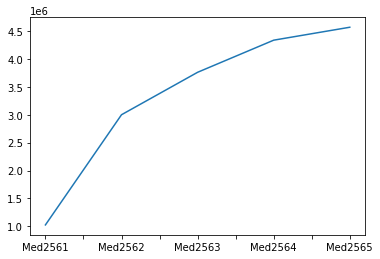

In [ ]:
df.loc[490, ['Med2561', 'Med2562', 'Med2563', 'Med2564', 'Med2565']].plot()

In [ ]:
def linear_model(x,a,b):
  return a*x +b

xdata = np.arange(1,6,1) #year 2561 = 1
ydata = df.loc[490, ['Med2561', 'Med2562', 'Med2563', 'Med2564', 'Med2565']].values

popt, pcov = optim.curve_fit(linear_model, xdata, ydata, method = 'lm') #method lm = least square
print('popt: ', popt)
print('pcov: ',pcov)

popt:  [841145.5015547  813438.29495347]
pcov:  [[ 3.51974349e+10 -1.05592304e+11]
 [-1.05592304e+11  3.87171782e+11]]


In [ ]:
# compute one standard deviation errors on the parameters use
np.sqrt(np.diag(pcov))

array([187609.79436863, 622231.29300516])

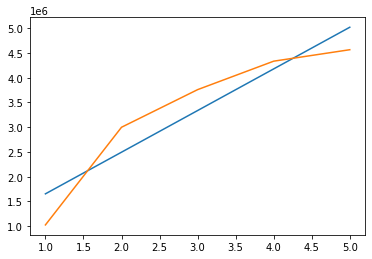

In [ ]:
#compute RMSE from model

x=np.arange(1,6,1)
ypred = popt[0]*x + popt[1]


plt.plot(x,ypred)
plt.plot(xdata,ydata)

In [ ]:
def root_mean_sqe(true_arr, pred_arr):
  """
  predic RMSE from 2 np.array data-1d
  they must be same length
  """
  if len(true_arr) == len(pred_arr):
    lengtharr = len(true_arr)
    point_mse = np.zeros((lengtharr,1))

    for i in range(lengtharr):
      point_mse[i] = true_arr[i]**2 - pred_arr[i]**2
    
    return np.sqrt(np.sum(point_mse)/lengtharr)
  else:
    print('array must be same length')

In [ ]:
rmse_test = root_mean_sqe(ydata,ypred)

In [ ]:
rmse_test

459548.2642376933

In [ ]:
#check rmse sholud not > 20% of average amount
def exceedRMSE(true_arr,rmse):
  avg = np.mean(true_arr)
  return rmse*100/avg

In [ ]:
exceedRMSE(ydata,rmse_test)

13.771819500457411

In [ ]:
Xpredict = 6
pred2566 = ypred = popt[0]*Xpredict + popt[1]
print(pred2566)

5860311.304281649


## all dataset

In [ ]:
df=df.reset_index()

### define function

In [ ]:
def linear_model(x,a,b):
  return a*x +b

def root_mean_sqe(true_arr, pred_arr):
  """
  predic RMSE from 2 np.array data-1d
  they must be same length
  """
  if len(true_arr) == len(pred_arr):
    lengtharr = len(true_arr)
    point_mse = np.zeros((lengtharr,1))

    for i in range(lengtharr):
      point_mse[i] = true_arr[i]**2 - pred_arr[i]**2
    
    return np.sqrt(np.sum(point_mse)/ lengtharr)
  else:
    print('array must be same length')

def percentRMSE(true_arr,rmse):
  avg = np.mean(true_arr)
  if avg == 0:
    return 0
  else:
    return rmse*100/avg


### run model

In [ ]:

'''
dict for collect result by Meditem
[slope, intercept, rmse, predic2566, Costrate]
'''
prediction_results = dict()

#list for collect medcode that has high RMSE, predict negative amount
med_highRMSE = []
negative_amount_prediction = []

#declare X
xdata = np.arange(1,6,1, dtype = 'int')#2561 (1) - 2565 (5) --> predict 2566 (6)
x2566 = 6

#declare model
def linear_model(x,a,b):
  return a*x +b

#lopp over medication
for i in range(len(df)):
  #list for collect data of each medication
  meditem = df.Meditem[i]
  med_result = []
  #get amount od medication by year
  ydata = df.loc[i,['Med2561', 'Med2562', 'Med2563',
       'Med2564', 'Med2565']].values
  popt,_ = optim.curve_fit(linear_model, xdata, ydata, method = 'lm')

  #slope = popt[0]=a, intercept = popt[1]=b
  slope, intercept = popt #[a,b]
  med_result.append(slope)
  med_result.append(intercept)

  #construct linear model
  ypred = linear_model(xdata,slope,intercept)

  #rmse
  rmse = root_mean_sqe(ydata,ypred)
  # med_result.append(rmse) #append after check pred2566
  
  #predict 2566
  """
  Note (after previous debug some drug predicting to negative.
  these due to decline of dispense and nearly zero at 2565.
  So, I will predict to half of amount at 2565.
  """
  pred2566 = linear_model(x2566,slope,intercept)
  if pred2566 < 0 :
    pred2566 = ydata[4]/2 # amunt of 2565/2
    negative_amount_prediction.append(meditem)
    #append rmse = 1/6 x amount 2565
    rmse = ydata[4]/6
  med_result.append(rmse)

  #check exceed rmse
  exceed = percentRMSE(ydata,rmse)
  if exceed > 30: #30%
    med_highRMSE.append(df.Meditem[i])
    
  #append pred2566
  med_result.append(pred2566)


  #append price of medication
  med_result.append(df.Medcost[i])

  #save in dict
  prediction_results[meditem] = med_result

print('finished')

finished


In [ ]:
prediction_results

{'5': [-19636.199930471605,
  148843.99979141483,
  29409.366916360017,
  31026.80020858519,
  6.96],
 '6': [-240517.59927073692, 970072.7978122106, 0.0, 0.0, 1.5],
 '7': [-149.00000214851923, 820.4000064455574, 0.0, 0.0, 117.7],
 '8': [433.29999720787686,
  1422.8999887043378,
  2629.696958199808,
  4022.699971951599,
  321.0],
 '16': [2543.4999932189817,
  -3442.2999751362813,
  1094.8834143977128,
  11818.699984177609,
  38.52],
 '17': [4091.600142300402,
  27690.799573098797,
  4479.124422368111,
  52240.40042690121,
  0.45],
 '36': [-0.40000000149011605, 1.6000000044703482, 0.0, 0.0, 1500.0],
 '45': [-53.09999950214969,
  278.69999850644905,
  0.6666666666666666,
  2.0,
  241.82],
 '48': [691.1999879504693,
  1999.4000380314312,
  1580.4794013137066,
  6146.599965734247,
  6.0],
 '52': [-35.599999757831455,
  478.1999992734938,
  135.97617451040907,
  264.6000007265051,
  119.84],
 '59': [22.000000000000007,
  275.0,
  37.10525569242179,
  407.00000000000006,
  26.75],
 '70': [-4.

In [ ]:
len(med_highRMSE)

998

In [ ]:
len(negative_amount_prediction)

474

In [ ]:
len(prediction_results)

2570

## demonstrate high RMSE medication
why?

In [ ]:
med_highRMSE

['5',
 '8',
 '48',
 '52',
 '108',
 '111',
 '113',
 '114',
 '130',
 '131',
 '145',
 '157',
 '171',
 '189',
 '208',
 '293',
 '297',
 '316',
 '354',
 '358',
 '377',
 '391',
 '396',
 '404',
 '415',
 '436',
 '449',
 '461',
 '465',
 '531',
 '535',
 '549',
 '552',
 '563',
 '584',
 '589',
 '619',
 '649',
 '688',
 '716',
 '728',
 '755',
 '768',
 '781',
 '800',
 '849',
 '885',
 '900',
 '916',
 '945',
 '953',
 '958',
 '1021',
 '1059',
 '1060',
 '1146',
 '1165',
 '1211',
 '1249',
 '1285',
 '1289',
 '1308',
 '1434',
 '1437',
 '1439',
 '1503',
 '1556',
 '1566',
 '1586',
 '1605',
 '1651',
 '1661',
 '1662',
 '1714',
 '1715',
 '1720',
 '1754',
 '1800',
 '1864',
 '1904',
 '1925',
 '1991',
 '1994',
 '2019',
 '2071',
 '2096',
 '2230',
 '2273',
 '2282',
 '2287',
 '2312',
 '2313',
 '2349',
 '2356',
 '2388',
 '2389',
 '2465',
 '2478',
 '2502',
 '2520',
 '2637',
 '2683',
 '2695',
 '2722',
 '2728',
 '2746',
 '2749',
 '2766',
 '2773',
 '2796',
 '2831',
 '2843',
 '2845',
 '2848',
 '3843',
 '3845',
 '3846',
 '388

In [ ]:
df[df.Meditem == med_highRMSE[40]]

,index,Meditem,Medtype,Medname,Medcost,LastEffctiveDate,Med2561,Med2562,Med2563,Med2564,Med2565
137,137,728,10,DICLOXACILLIN 250 MG.,1.06,2016-11-24,11990,13111,39842,18701,22444


In [ ]:
prediction_results['728']

[2649.799972720365,
 13268.200091112969,
 9331.203269439346,
 29166.999927435158,
 1.06]

In [ ]:
df[df.Meditem == med_highRMSE[60]]

,index,Meditem,Medtype,Medname,Medcost,LastEffctiveDate,Med2561,Med2562,Med2563,Med2564,Med2565
227,227,1289,10,KETOTIFEN ( Keten ) 60 ML,40.66,2018-10-24,0,126,77,0,0


In [ ]:
prediction_results['1289']

[-12.599999920527157,
 78.39999976158148,
 48.93996326117777,
 2.8000002384185336,
 40.66]

Problem from data --> but nearly zero

### create dataframe from 1st result

In [ ]:
#create pandas dataframe
linear_all_result = pd.DataFrame.from_dict(prediction_results, orient = 'index',
                       columns = ['slope','intercept','rmse','predict2566','cost_unit'])

In [ ]:
linear_all_result = linear_all_result.reset_index()
columns_name = ['Meditem','slope','intercept','rmse','predict2566','cost_unit' ]
linear_all_result.columns = columns_name
linear_all_result.head()

,Meditem,slope,intercept,rmse,predict2566,cost_unit
0,5,-19636.199930,148843.999791,29409.366916,31026.800209,6.96
1,6,-240517.599271,970072.797812,0.000000,0.000000,1.50
2,7,-149.000002,820.400006,0.000000,0.000000,117.70
3,8,433.299997,1422.899989,2629.696958,4022.699972,321.00
4,16,2543.499993,-3442.299975,1094.883414,11818.699984,38.52


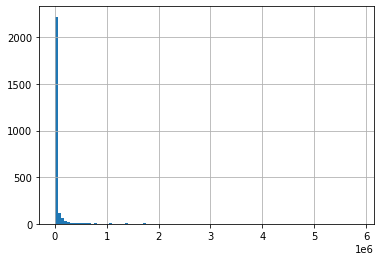

In [ ]:
#check prediction 
linear_all_result.predict2566.hist(bins=100)

## Try linear regression model for all

In [ ]:
linear_all_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Meditem      2570 non-null   object 
 1   slope        2570 non-null   float64
 2   intercept    2570 non-null   float64
 3   rmse         2570 non-null   float64
 4   predict2566  2570 non-null   float64
 5   cost_unit    2570 non-null   float64
dtypes: float64(5), object(1)
memory usage: 120.6+ KB


In [ ]:
linear_all_result.to_csv('/content/drive/MyDrive/medication_prediction_project/results/linear_regression_allmed.csv', index = False)

# Montecarlo simulation

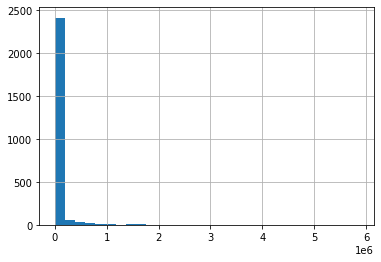

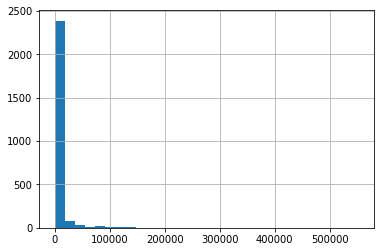

In [ ]:
linear_all_result.predict2566.hist(bins=30)
plt.show()
linear_all_result.rmse.hist(bins=30)
plt.show()

In [ ]:
"""
Price from predict2566/rmse
"""

budget2566 = linear_all_result[['Meditem','cost_unit', 'predict2566','rmse']].copy()
budget2566

,Meditem,cost_unit,predict2566,rmse
0,5,6.96,31026.800209,29409.366916
1,6,1.50,0.000000,0.000000
2,7,117.70,0.000000,0.000000
3,8,321.00,4022.699972,2629.696958
4,16,38.52,11818.699984,1094.883414
...,...,...,...,...
2565,5070000088,30.00,0.400000,0.800000
2566,5070000090,100.00,204.800000,72.407734
2567,5070000091,40.00,0.000000,0.000000
2568,5070000093,250.00,1474.999999,520.856065


In [ ]:
budget2566['cost2566_predict'] = budget2566.apply(lambda x: x['cost_unit']*x['predict2566'], axis=1)
budget2566['cost2566_rmse'] = budget2566.apply(lambda x: x['cost_unit']*x['rmse'], axis=1)

In [ ]:
budget2566

,Meditem,cost_unit,predict2566,rmse,cost2566_predict,cost2566_rmse
0,5,6.96,31026.800209,29409.366916,2.159465e+05,204689.193738
1,6,1.50,0.000000,0.000000,0.000000e+00,0.000000
2,7,117.70,0.000000,0.000000,0.000000e+00,0.000000
3,8,321.00,4022.699972,2629.696958,1.291287e+06,844132.723582
4,16,38.52,11818.699984,1094.883414,4.552563e+05,42174.909123
...,...,...,...,...,...,...
2565,5070000088,30.00,0.400000,0.800000,1.200000e+01,24.000000
2566,5070000090,100.00,204.800000,72.407734,2.048000e+04,7240.773439
2567,5070000091,40.00,0.000000,0.000000,0.000000e+00,0.000000
2568,5070000093,250.00,1474.999999,520.856065,3.687500e+05,130214.016167


In [ ]:
print(f'predicting average of budget in 2566 = {round(budget2566.cost2566_predict.sum(),2)}')

predicting average of budget in 2566 = 1415687562.09


In [ ]:
"""
Montecarlo simulation
2570 drugs with vary cost by RMSE_price
"""


#check executing time
start_time = time.time()

#declare variables
simulations = 100000
num_drugs = budget2566.shape[0]
np.random.seed(911)

#turn data to numpy array for speeding
costdata = budget2566[['cost2566_predict','cost2566_rmse']].values
#2d-np array

#np array to collect result each simulation
simulation_cost = np.zeros((simulations,1))

#run
for iteration in range(simulations):
  if iteration%5000 == 0:
    print(iteration)
  
  total_cost = np.zeros((num_drugs,1))

  for i in range(num_drugs):
    #vary input
    mu, std_error = costdata[i,0], costdata[i,1]
    cost_i = np.abs(np.random.normal(loc = mu, scale = std_error, size = None)) #None -> 1 value
    total_cost[i] = cost_i
  
  # function = sum
  simulation_cost[iteration] = np.sum(total_cost)

print('finished')
print("--- %s seconds ---" % (time.time() - start_time))

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
finished
--- 1371.0721626281738 seconds ---


(array([4.0000e+00, 1.5000e+01, 4.9000e+01, 9.6000e+01, 2.1100e+02,
        5.1800e+02, 9.9000e+02, 1.7050e+03, 2.9680e+03, 4.5100e+03,
        6.4370e+03, 8.4460e+03, 9.9750e+03, 1.1111e+04, 1.1110e+04,
        1.0497e+04, 9.2590e+03, 7.3820e+03, 5.5710e+03, 3.7550e+03,
        2.4840e+03, 1.4100e+03, 7.8800e+02, 3.6200e+02, 2.1100e+02,
        8.6000e+01, 2.5000e+01, 1.6000e+01, 5.0000e+00, 4.0000e+00]),
 array([1.38628607e+09, 1.38955211e+09, 1.39281816e+09, 1.39608420e+09,
        1.39935025e+09, 1.40261629e+09, 1.40588234e+09, 1.40914838e+09,
        1.41241443e+09, 1.41568047e+09, 1.41894652e+09, 1.42221256e+09,
        1.42547861e+09, 1.42874465e+09, 1.43201070e+09, 1.43527674e+09,
        1.43854279e+09, 1.44180883e+09, 1.44507488e+09, 1.44834092e+09,
        1.45160697e+09, 1.45487301e+09, 1.45813906e+09, 1.46140510e+09,
        1.46467115e+09, 1.46793719e+09, 1.47120323e+09, 1.47446928e+09,
        1.47773532e+09, 1.48100137e+09, 1.48426741e+09]),
 <a list of 30 Patch objects

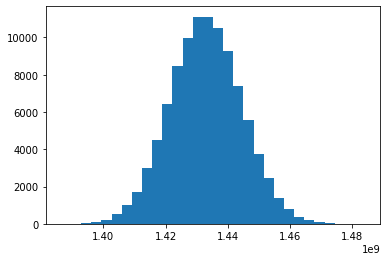

In [ ]:
plt.hist(simulation_cost, bins=30)

In [ ]:
budget2566.cost2566_predict.sum()

1415687562.090982

# Save and Report

In [ ]:
#save simulation to csv file
simulation_cost.tofile('/content/drive/MyDrive/medication_prediction_project/results/cost_medication_2566_prediction_montecarlo.csv', sep = ',')

In [ ]:
#save simulation to text file
np.savetxt('/content/drive/MyDrive/medication_prediction_project/results/cost_medication_2566_prediction_montecarlo.txt',simulation_cost )

In [ ]:
df

,index,Meditem,Medtype,Medname,Medcost,LastEffctiveDate,Med2561,Med2562,Med2563,Med2564,Med2565
0,0,5,10,IRBESARTAN (APROVEL) 150 MG.,6.96,2017-05-17,94583,130216,115275,96186,13417
1,1,6,10,HY-DRALAZINE (APRESOLINE) 25 MG.,1.50,2012-08-20,1202588,0,40012,0,0
2,2,7,40,CISPLATIN (CA) 10 MG.,117.70,2015-11-27,506,478,883,0,0
3,3,8,40,CISPLATIN (CA) 50 MG.,321.00,2022-04-26,520,936,7977,2053,2128
4,4,16,10,ACETAR 1000 ML.,38.52,2022-09-07,499,606,3347,5939,10550
...,...,...,...,...,...,...,...,...,...,...,...
2565,2571,5070000088,70,Sodium Bicarb (30mL) 1meq/mL,30.00,2021-12-07,0,0,2,0,0
2566,2572,5070000090,70,Fluoride (100G) 1%,100.00,2021-12-07,0,0,0,0,256
2567,2573,5070000091,70,Phenobarb (30mL) 10mg/mL,40.00,2021-12-09,0,0,0,0,0
2568,2574,5070000093,70,Favipiravir [30mL] 100 mg/mL,250.00,2022-12-07,0,0,3,0,1843


In [ ]:
temp = budget2566[['Meditem','predict2566','rmse','cost2566_predict','cost2566_rmse']].copy()
temp = temp.set_index('Meditem')
ndf = df.set_index('Meditem').join(temp).reset_index()

In [ ]:
ndf.drop('index', axis=1, inplace = True)

In [ ]:
ndf


,Meditem,Medtype,Medname,Medcost,LastEffctiveDate,Med2561,Med2562,Med2563,Med2564,Med2565,predict2566,rmse,cost2566_predict,cost2566_rmse
0,5,10,IRBESARTAN (APROVEL) 150 MG.,6.96,2017-05-17,94583,130216,115275,96186,13417,31026.800209,29409.366916,2.159465e+05,204689.193738
1,6,10,HY-DRALAZINE (APRESOLINE) 25 MG.,1.50,2012-08-20,1202588,0,40012,0,0,0.000000,0.000000,0.000000e+00,0.000000
2,7,40,CISPLATIN (CA) 10 MG.,117.70,2015-11-27,506,478,883,0,0,0.000000,0.000000,0.000000e+00,0.000000
3,8,40,CISPLATIN (CA) 50 MG.,321.00,2022-04-26,520,936,7977,2053,2128,4022.699972,2629.696958,1.291287e+06,844132.723582
4,16,10,ACETAR 1000 ML.,38.52,2022-09-07,499,606,3347,5939,10550,11818.699984,1094.883414,4.552563e+05,42174.909123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,5070000088,70,Sodium Bicarb (30mL) 1meq/mL,30.00,2021-12-07,0,0,2,0,0,0.400000,0.800000,1.200000e+01,24.000000
2566,5070000090,70,Fluoride (100G) 1%,100.00,2021-12-07,0,0,0,0,256,204.800000,72.407734,2.048000e+04,7240.773439
2567,5070000091,70,Phenobarb (30mL) 10mg/mL,40.00,2021-12-09,0,0,0,0,0,0.000000,0.000000,0.000000e+00,0.000000
2568,5070000093,70,Favipiravir [30mL] 100 mg/mL,250.00,2022-12-07,0,0,3,0,1843,1474.999999,520.856065,3.687500e+05,130214.016167


In [ ]:
#save report file to excel
ndf.to_excel('/content/drive/MyDrive/medication_prediction_project/results/ResultMedicinePrediction2566.xlsx', index=False)